Projeto de Análise Exploratória de Dados

1.   Base de dados fictícia sobre desempenho acadêmico em matemática, leitura e escrita.


Objetivo: Explorar e visualizar os dados para entender o desempenho acadêmico dos estudantes em matemática e língua portuguesa, identificando padrões e insights relevantes.

Jhecy Ketlin





**PASSOS ESSENCIAIS**

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# importando dados
base_dados = pd.read_csv("StudentsPerformance.csv")

**Passo 1: entender os dados**

In [ ]:
# 5 primeiras linhas
base_dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# dimensão (linhas e colunas)
base_dados.shape

(1000, 8)

In [ ]:
# infos sobre todas as colunas
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#nome das colunas
base_dados.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# estatisticas de todas as colunas numericas
base_dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Passo 2: preparar os dados**

In [ ]:
# convertendo tipo de dados
colunas_para_converter = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

base_dados[colunas_para_converter] = base_dados[colunas_para_converter].astype('string')

# conferindo a conversão
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   string
 1   race/ethnicity               1000 non-null   string
 2   parental level of education  1000 non-null   string
 3   lunch                        1000 non-null   string
 4   test preparation course      1000 non-null   string
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), string(5)
memory usage: 62.6 KB


Usando o .rename(columns = {}) renomea-se os nomes conforme expressado no código.

Usando o .columns() = [] renomea-se os nomes seguindo a ordem das colunas.

inplace = True, substitui os valores no df original

In [ ]:
# renomeando colunas
base_dados = base_dados.rename(columns = {'gender': "Genero",
                             'race/ethnicity': 'Raça',
                             'parental level of education': 'Escolaridade_dos_Pais',
                             'lunch': 'Almoço',
                             'test preparation course': 'Teste_Preparatorio',
                             'math score': 'Nota_Matematica',
                             'reading score': 'Nota_Leitura',
                              'writing score': 'Nota_Leitura'}).copy()

In [ ]:
# renomeando uma coluna
base_dados = base_dados.rename(columns = {'Teste_Preparatorio' : 'Curso_Preparatorio'})

In [ ]:
# renomeando a seegunda coluna com nome repetido
base_dados.columns.values[7] = 'Nota_Escrita'

In [ ]:
# dados duplicados
base_dados.duplicated().sum()

0

In [ ]:
# dados nulos
base_dados.isna().sum()

,0
Genero,0
Raça,0
Escolaridade_dos_Pais,0
Almoço,0
Curso_Preparatorio,0
Nota_Matematica,0
Nota_Leitura,0
Nota_Leitura,0


In [ ]:
#outra forma

# base_dados.isnull().sum()

In [ ]:
# substituir os atritutos das colunas
base_dados["Genero"] = base_dados["Genero"].replace({"female": "feminino",
                                                     "male" : "masculino"})

base_dados["Escolaridade_dos_Pais"] = base_dados["Escolaridade_dos_Pais"].replace({"bachelor's degree" : "graduaçao",
                                                                                             "some college" : "superior incompleto",
                                                                                             "some high school" : "ensino medio incompleto",
                                                                                             "master's degree" : "mestrado",
                                                                                             "associate's degree" : "ensino tecnico",
                                                                                             "high school" : "ensino medio completo"})

base_dados["Almoço"] = base_dados["Almoço"].replace({"standard" : "padrao",
                                                     "free/reduced" : "reduzido"})

base_dados["Curso_Preparatorio"] = base_dados["Curso_Preparatorio"].replace({"none" : "nao",
                                                                             "completed" : "sim"})

**Passo 3: entendimento das variaveis (univariada)**

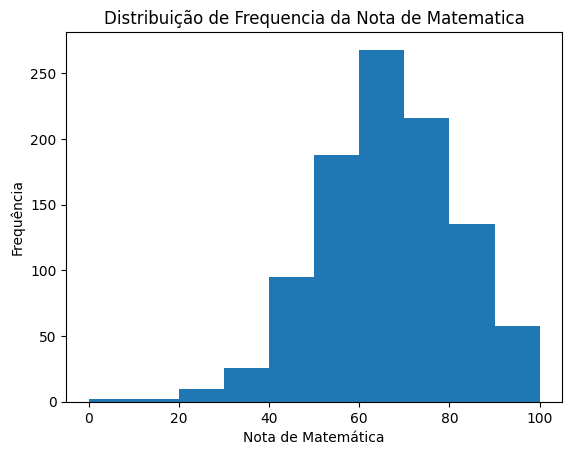

In [ ]:
# histograma
plt.hist (base_dados['Nota_Matematica'])

plt.title("Distribuição de Frequencia da Nota de Matematica")
plt.xlabel ("Nota de Matemática")
plt.ylabel ("Frequência")

plt.show()

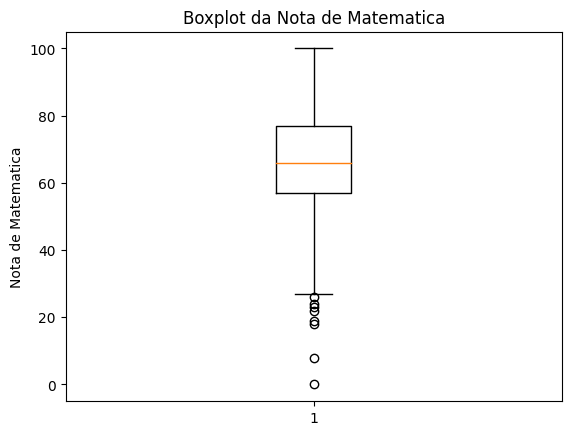

In [ ]:
# boxplot
plt.boxplot(base_dados["Nota_Matematica"])

plt.title("Boxplot da Nota de Matematica")
plt.ylabel("Nota de Matematica")

plt.show()


**Passo 4: relações entre variáveis**

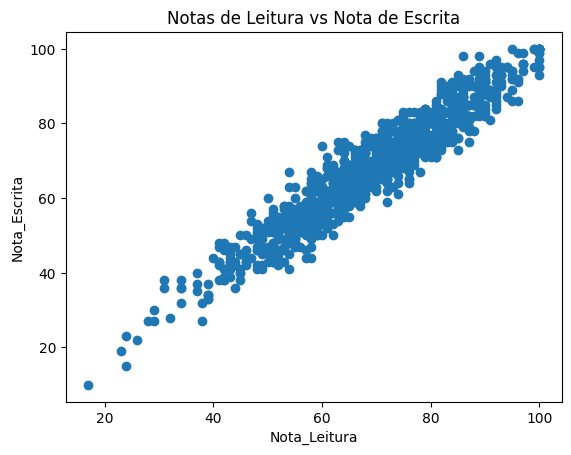

In [ ]:
# grafico de dispersão
plt.scatter(base_dados["Nota_Leitura"], base_dados["Nota_Escrita"])

plt.title("Notas de Leitura vs Nota de Escrita")
plt.xlabel("Nota_Leitura")
plt.ylabel("Nota_Escrita")

plt.show()

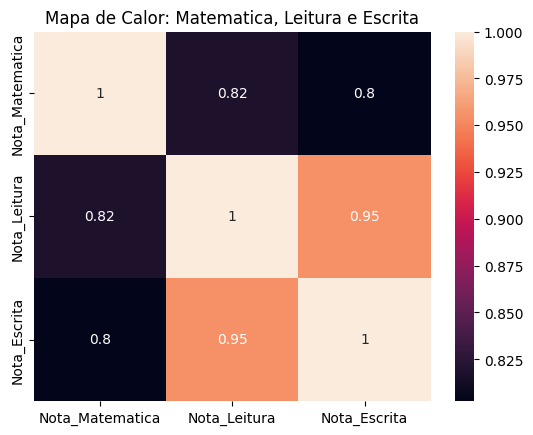

In [ ]:
# mapa de calor
colunas_para_mapa = base_dados[["Nota_Matematica", "Nota_Leitura", "Nota_Escrita"]]

correlacao = colunas_para_mapa.corr()

plt.title("Mapa de Calor: Matematica, Leitura e Escrita")
sns.heatmap(correlacao, annot = True)
plt.show()

**Passo 5: responder questões sobre os dados**

**1- Qual é a distribuição das notas em matemática, leitura e escrita por Gênero?**

In [ ]:
# Media das notas por genero
base_dados.groupby("Genero")[["Nota_Matematica", "Nota_Leitura", "Nota_Escrita"]].mean() # notas entre 2 colchetes pq são uma lista de colunas

,Nota_Matematica,Nota_Leitura,Nota_Escrita
Genero,,,
feminino,63.633205,72.608108,72.467181
masculino,68.728216,65.473029,63.311203


In [ ]:
# nota de matematica separada por genero
genero_fem = base_dados.query("Genero == 'feminino'")["Nota_Matematica"] # feminino está, também, entre aspas simples, pq é string

genero_masc = base_dados.query("Genero == 'masculino'")["Nota_Matematica"]

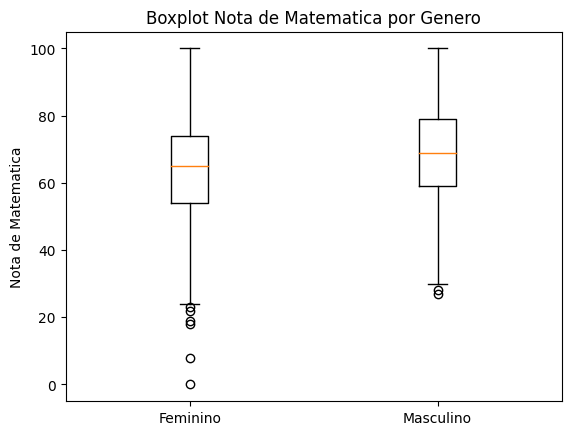

In [ ]:
# nota de matematica dpor genero
plt.title("Boxplot Nota de Matematica por Genero")
plt.ylabel("Nota de Matematica")
plt.boxplot([genero_fem, genero_masc], labels = ["Feminino", "Masculino"])
plt.show()

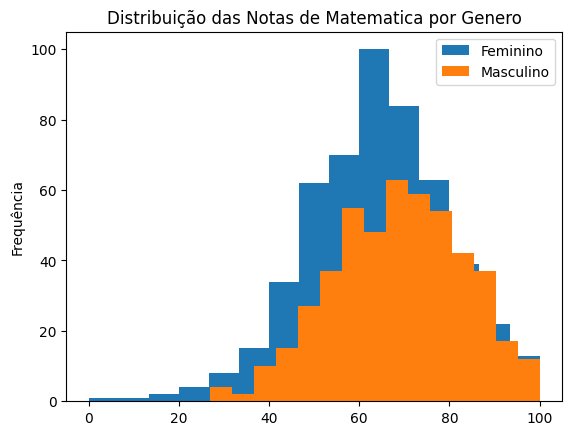

In [ ]:
# histograma
plt.title("Distribuição das Notas de Matematica por Genero")
plt.ylabel("Frequência")
plt.hist(genero_fem, bins = 15, label = "Feminino",)
plt.hist(genero_masc, bins = 15, label = "Masculino")
plt.legend() # pro plt.legend funcionar, é necessario colocar o label lá no plt.hist
plt.show()

Notamos, conforme as médias expostas anteriormente, que os meninos tem maior média na matéria de cálculo, enquanto as meninas tem melhor desempenho em escrita e leitura.

Vemos que no caso de matemática há maior incidência de outliers nas notas do gênero feminino, tendo situações de nota zero. Já no gênero oposto, não houve ninguém que zerasse a matéria.

**2- Como a nota média de matemática varia com o nível de escolaridade dos pais?**

In [12]:
base_dados.groupby("Escolaridade_dos_Pais")[["Nota_Matematica", "Nota_Leitura",	"Nota_Escrita"]].mean()

,Nota_Matematica,Nota_Leitura,Nota_Escrita
Escolaridade_dos_Pais,,,
ensino medio completo,62.137755,64.704082,62.448980
ensino medio incompleto,63.497207,66.938547,64.888268
ensino tecnico,67.882883,70.927928,69.896396
graduaçao,69.389831,73.000000,73.381356
mestrado,69.745763,75.372881,75.677966
superior incompleto,67.128319,69.460177,68.840708


In [16]:
# calculando a nota média dos alunos
base_dados["Nota_Media"] = (base_dados["Nota_Matematica"] + base_dados["Nota_Leitura"] + base_dados["Nota_Escrita"]) / 3
base_dados.head()

,Genero,Raça,Escolaridade_dos_Pais,Almoço,Curso_Preparatorio,Nota_Matematica,Nota_Leitura,Nota_Escrita,Nota_Media
0,feminino,group B,graduaçao,padrao,nao,72,72,74,72.666667
1,feminino,group C,superior incompleto,padrao,sim,69,90,88,82.333333
2,feminino,group B,mestrado,padrao,nao,90,95,93,92.666667
3,masculino,group A,ensino tecnico,reduzido,nao,47,57,44,49.333333
4,masculino,group C,superior incompleto,padrao,nao,76,78,75,76.333333


In [18]:
base_dados.groupby("Escolaridade_dos_Pais")["Nota_Media"].mean()\
.sort_values(ascending = True)

,Nota_Media
Escolaridade_dos_Pais,
ensino medio completo,63.096939
ensino medio incompleto,65.108007
superior incompleto,68.476401
ensino tecnico,69.569069
graduaçao,71.923729
mestrado,73.598870


para filtrar dados:

forma 1: base_dados.query("Escolaridade_dos_Pais == 'ensino medio completo' or Escolaridade_dos_Pais == 'superior incompleto'")

forma 2: base_dados.query("Escolaridade_dos_Pais in ['ensino medio completo', 'superior incompleto']")


In [27]:
# media da nota média dos alunos cujos nivel escolar dos pais é ensino médio completo
base_dados.query("Escolaridade_dos_Pais == 'ensino medio completo' or Escolaridade_dos_Pais == 'superior incompleto'")["Nota_Media"].mean()


65.97788309636653

Como calculado acima, se considerarmos "ensino medio completo" e "superior incompleto" como uma mesma categoria, veria-se um aumento das médias dos alunos conforme o aumento do nivel escolar dos pais.

Por lógica, a pessoa que ainda não terminou o ensino superior tem ensino médio completo. Por isso poderiam ser tratados como uma mesma categoria.

ensino medio incompleto	65.108

ensino medio completo	65.978

ensino tecnico	69.569

graduaçao	71.924

mestrado	73.599


**3- Estudantes que fizeram o curso preparatório para o teste tiveram uma pontuação média maior do que aqueles que não fizeram?**

In [45]:
curso_prep = base_dados.groupby("Curso_Preparatorio")[["Nota_Matematica","Nota_Leitura","Nota_Escrita","Nota_Media"]].mean()
curso_prep

,Nota_Matematica,Nota_Leitura,Nota_Escrita,Nota_Media
Curso_Preparatorio,,,,
nao,64.077882,66.534268,64.504673,65.038941
sim,69.695531,73.893855,74.418994,72.669460


Vemos também que os candidatos que realizaram curso preparatório tem melhor desempenho em todas as matérias. A média das notas desses alunos foi 72,66. Já os alunos sem curso preparatório alcançaram a média de 65,03.

**4- A nota média dos alunos em cada disciplina (matemática, leitura e escrita) varia conforme o tipo de almoço recebido?**

In [33]:
base_dados.groupby("Almoço")[["Nota_Matematica","Nota_Leitura","Nota_Escrita","Nota_Media"]].mean()

,Nota_Matematica,Nota_Leitura,Nota_Escrita,Nota_Media
Almoço,,,,
padrao,70.034109,71.654264,70.823256,70.837209
reduzido,58.921127,64.653521,63.022535,62.199061


Aqui notamos que o tipo de almoço pode interferir na performance dos candidatos. Os alunos que optaram pelo almoço reduzido obtiveram menores notas comparada aos que optaram pelo almoço padrão.

**5- Quais combinações de gênero e raça/etnia apresentam as maiores notas médias em leitura?**

In [34]:
base_dados.head()

,Genero,Raça,Escolaridade_dos_Pais,Almoço,Curso_Preparatorio,Nota_Matematica,Nota_Leitura,Nota_Escrita,Nota_Media
0,feminino,group B,graduaçao,padrao,nao,72,72,74,72.666667
1,feminino,group C,superior incompleto,padrao,sim,69,90,88,82.333333
2,feminino,group B,mestrado,padrao,nao,90,95,93,92.666667
3,masculino,group A,ensino tecnico,reduzido,nao,47,57,44,49.333333
4,masculino,group C,superior incompleto,padrao,nao,76,78,75,76.333333


In [54]:
# filtrando genero por raça
base_dados.groupby(["Genero", "Raça"])[["Nota_Matematica","Nota_Leitura","Nota_Escrita","Nota_Media"]].mean()

Nota_Matematica  Nota_Leitura  Nota_Escrita  Nota_Media
Genero    Raça                                                            
feminino  group A        58.527778     69.000000     67.861111   65.129630
          group B        61.403846     71.076923     70.048077   67.509615
          group C        62.033333     71.944444     71.777778   68.585185
          group D        65.248062     74.046512     75.023256   71.439276
          group E        70.811594     75.840580     75.536232   74.062802
masculino group A        63.735849     61.735849     59.150943   61.540881
          group B        65.930233     62.848837     60.220930   63.000000
          group C        67.611511     65.424460     62.712230   65.249400
          group D        69.413534     66.135338     65.413534   66.987469
          group E        76.746479     70.295775     67.394366   71.478873

Conforme a tabela acima, tem-se alguns grupos que se destacam pelo bom desempenho em alguma das matérias analisadas.

Top 3 de média desempenho:

1° Masculino, Raça E: 76,74 (em matematica)

2° Feminino, Raça E: 75,84 (em leitura)

3° Feminino, Raça E: 75,53 (em escrita)

Vale ressaltar também que em ambos os gêneros, o grupo E teve melhor média de desempenho em todas as materias em questão. As piiores atuações no exame foram dos grupo A.

Além do mais, com exceção de matemática, as mulheres de todas as raças superaram o sexo oposto em todas as matérias.